## Evaluation of a force sensor

Andrés Marrugo, PhD     
Universidad Tecnológica de Bolívar

A force sensor (FSR) is evaluated experimentally. To do so, the resistance of the sensor is measured for a range of forces as follows:

Calculate the sensitivity of the sensor throughout its range.

|    |    |    |    |    |    |    |    |    |    |    |    |    |    |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| F [N] 	  |50|100|150|200|250|300|350|400|450|500|550|600|650|
| R [$\Omega$] |500|256.4|169.5|144.9|125|100|95.2|78.1|71.4|65.8|59.9|60|55.9|
|    |    |    |    |    |    |    |    |    |    |    |    |    |    |

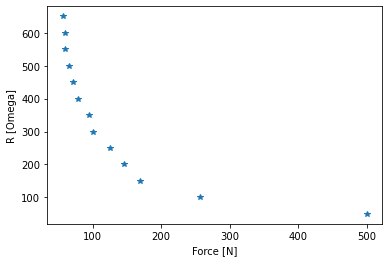

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

F = np.array([50,100,150,200,250,300,350,400,450,500,550,600,650])
R = np.array([500,256.4,169.5,144.9,125,100,95.2,78.1,71.4,65.8,59.9,60,55.9])

plt.plot(R,F,'*')
plt.ylabel('R [Omega]')
plt.xlabel('Force [N]')
plt.show()



Sensitivity is the slope of the resistance versus force curve and is clearly a nonlinear quantity. However, we recall that force resistive sensors have a linear relation between force ($F$) and conductance ($1/R$). Therefore it is simpler to first calculate the conductance $C$.


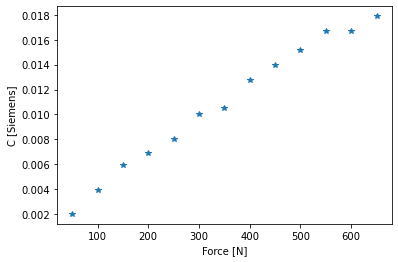

In [3]:
C = 1/R

plt.plot(F,C,'*')
plt.ylabel('C [Siemens]')
plt.xlabel('Force [N]')
plt.show()

The coefficients are a = 2.6598933589794053e-05 b = 0.0014952107076581617


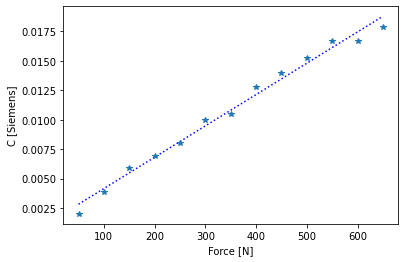

In [5]:
# polyfit computes the coefficients a and b of degree=1
a,b = np.polyfit(F,C,1)

print('The coefficients are a =',a,'b =',b)

C1 = a*F+b
plt.plot(F,C1,':b',label='Fitted line')
plt.plot(F,C,'*')
plt.ylabel('C [Siemens]')
plt.xlabel('Force [N]')
plt.show()

The conductance is $C = 2.65989e-5 F + 0.0014952  \; [1/\Omega]$ 

The sensitivity is 
$$
\frac{dR}{dF} = \frac{-2.65989e-5}{(2.65989e-5 F + 0.0014952)^2} \; [\Omega/N].
$$

Let's evaluate it at, for example, $F=300 N$.

In [27]:
Fs = 300
s = (-2.65989e-5) / (2.65989e-5 * Fs + 0.0014952)**2

print('The sensitivity at F = {} is s: {:.4f} Ω/N'.format(Fs, s))

The sensitivity at F = 300 is s: -0.2963 Ω/N


Let's compare against doing a direct least squares regression.

The coefficients are a = -0.4891648351648349 b = 308.29230769230765


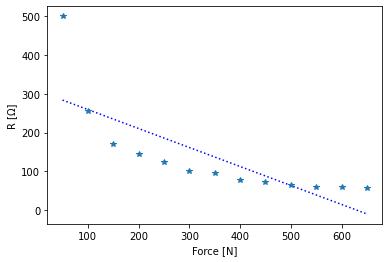

The approximate sensitivity is s = -0.4892 Ω/N.


In [32]:
# polyfit computes the coefficients a and b of degree=1
a,b = np.polyfit(F,R,1)

print('The coefficients are a =',a,'b =',b)

R1 = a*F+b
plt.plot(F, R1,':b',label='Fitted line')
plt.plot(F,R,'*')
plt.ylabel('R [Ω]')
plt.xlabel('Force [N]')
plt.show()

print('The approximate sensitivity is s = {:.4f} Ω/N.'.format(a))

We have used two ways to determine the sensitivity of the force sensor. Both approaches have pros and cons, but the results are comparable. 

> This page was written in the [IPython Jupyter Notebook](https://jupyter.org/). To download the notebook click on this option at the top menu or get it from the [github repo](https://github.com/agmarrugo/sensors-actuators).